In [4]:
# Mawrer Amed Ramirez Martinez
# Avance de TOG IDI 4
# ms723737@iteso.mx
# Notebook para Crear Resampling a partir de Full_data (6,539,138 de registros por minuto)
# desde 2000 al 2019

import numpy as np
np.random.seed(1)
from tensorflow import set_random_seed 
set_random_seed(2)

from datetime import datetime

import matplotlib.pyplot as plt
from matplotlib import pyplot
from matplotlib.pyplot import figure
import matplotlib.dates as mdates
import plotly.graph_objects as go

import pandas as pd
from pandas.plotting import autocorrelation_plot
from pandas.plotting import scatter_matrix
import math as m
import os, glob

In [5]:
import warnings
warnings.filterwarnings("ignore")

In [18]:

pwd = os.getcwd()
source_data = os.path.join(pwd, r'../../../Datasets/histdata/eurusd/FULL/')
filenames = glob.glob(source_data + "/*.*")
filenames.sort()
for file in filenames:
    print(os.path.basename(file))


full_data.csv


In [19]:
dateparse = lambda x: pd.datetime.strptime(x, '%Y-%m-%d %H:%M:%S')
dataset = pd.read_csv(filenames[0], date_parser=dateparse, parse_dates=[0], index_col=0, header=0)
    

In [20]:
print(dataset.columns)
print(dataset.dtypes)
print(dataset.shape)


Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')
Open      float64
High      float64
Low       float64
Close     float64
Volume      int64
dtype: object
(6539138, 5)


In [23]:
print(dataset.head(10))
print(dataset.tail(10))

                       Open    High     Low   Close  Volume
Timestamp                                                  
2000-05-30 17:27:00  0.9302  0.9302  0.9302  0.9302       0
2000-05-30 17:35:00  0.9304  0.9305  0.9304  0.9305       0
2000-05-30 17:38:00  0.9304  0.9304  0.9303  0.9303       0
2000-05-30 17:43:00  0.9301  0.9301  0.9300  0.9300       0
2000-05-30 17:44:00  0.9298  0.9298  0.9297  0.9297       0
2000-05-30 18:29:00  0.9298  0.9299  0.9298  0.9299       0
2000-05-30 18:37:00  0.9300  0.9300  0.9300  0.9300       0
2000-05-30 18:40:00  0.9299  0.9299  0.9299  0.9299       0
2000-05-30 18:41:00  0.9300  0.9300  0.9300  0.9300       0
2000-05-30 18:42:00  0.9299  0.9299  0.9298  0.9299       0
                        Open     High      Low    Close  Volume
Timestamp                                                      
2019-12-31 16:50:00  1.12133  1.12136  1.12132  1.12135       0
2019-12-31 16:51:00  1.12135  1.12135  1.12126  1.12127       0
2019-12-31 16:52:00  1.1

In [108]:
sub_dataset = dataset[:"2000-12-31"]

<Figure size 1008x360 with 0 Axes>

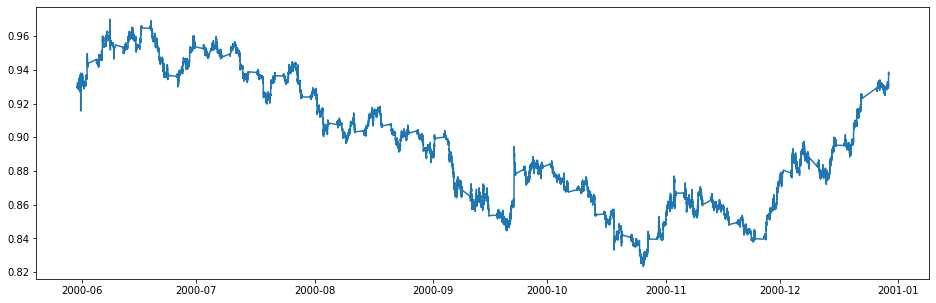

In [109]:
plt.figure(figsize=(14,5))
pyplot.figure(figsize=(16,5))
pyplot.plot(sub_dataset['Close'])
#Se observan muchas lineas horizontales, se inicia analisis. 

In [111]:
sub_dataset['Pct_Range'] = sub_dataset['Close'].pct_change()

In [112]:
sub_dataset.tail(10)

,Open,High,Low,Close,Volume,Pct_Range
Timestamp,,,,,,
2000-12-29 11:15:00,0.9375,0.9376,0.9375,0.9376,0,0.000000
2000-12-29 11:16:00,0.9374,0.9374,0.9372,0.9372,0,-0.000427
2000-12-29 11:17:00,0.9373,0.9374,0.9372,0.9374,0,0.000213
2000-12-29 11:19:00,0.9375,0.9375,0.9375,0.9375,0,0.000107
2000-12-29 11:20:00,0.9376,0.9378,0.9376,0.9377,0,0.000213
2000-12-29 11:21:00,0.9376,0.9377,0.9371,0.9372,0,-0.000533
2000-12-29 11:22:00,0.9374,0.9375,0.9370,0.9375,0,0.000320
2000-12-29 11:23:00,0.9374,0.9374,0.9371,0.9372,0,-0.000320
2000-12-29 11:24:00,0.9375,0.9375,0.9374,0.9374,0,0.000213


<Figure size 1008x360 with 0 Axes>

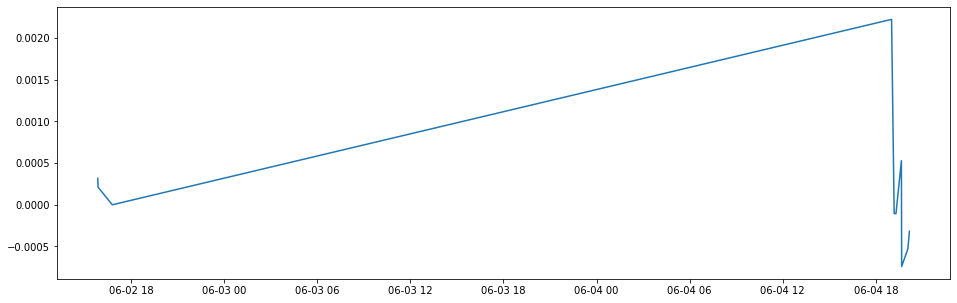

In [129]:
plt.figure(figsize=(14,5))
pyplot.figure(figsize=(16,5))
pyplot.plot(sub_dataset['Pct_Range'][1600:1610])

In [130]:
sub_dataset[1600:1610]

,Open,High,Low,Close,Volume,Pct_Range
Timestamp,,,,,,
2000-06-02 15:51:00,0.9437,0.9438,0.9437,0.9438,0,0.000318
2000-06-02 15:52:00,0.9440,0.9440,0.9440,0.9440,0,0.000212
2000-06-02 16:47:00,0.9440,0.9440,0.9440,0.9440,0,0.000000
2000-06-04 19:01:00,0.9461,0.9461,0.9461,0.9461,0,0.002225
2000-06-04 19:11:00,0.9460,0.9460,0.9460,0.9460,0,-0.000106
2000-06-04 19:18:00,0.9459,0.9459,0.9459,0.9459,0,-0.000106
2000-06-04 19:39:00,0.9464,0.9464,0.9464,0.9464,0,0.000529
2000-06-04 19:40:00,0.9459,0.9459,0.9457,0.9457,0,-0.000740
2000-06-04 20:04:00,0.9452,0.9452,0.9452,0.9452,0,-0.000529


<Figure size 1008x360 with 0 Axes>

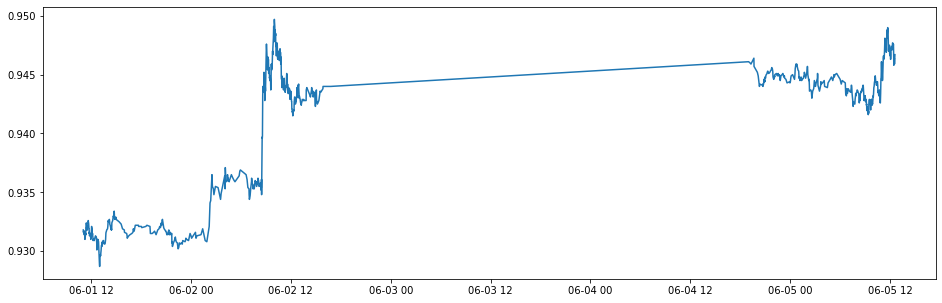

In [131]:
plt.figure(figsize=(14,5))
pyplot.figure(figsize=(16,5))
pyplot.plot(sub_dataset['Close'][1000:2000])

In [133]:
sub_dataset['Date'] = sub_dataset.index
#print(sub_dataset.dtypes)
print(sub_dataset['Date'][:10])

Timestamp
2000-05-30 17:27:00   2000-05-30 17:27:00
2000-05-30 17:35:00   2000-05-30 17:35:00
2000-05-30 17:38:00   2000-05-30 17:38:00
2000-05-30 17:43:00   2000-05-30 17:43:00
2000-05-30 17:44:00   2000-05-30 17:44:00
2000-05-30 18:29:00   2000-05-30 18:29:00
2000-05-30 18:37:00   2000-05-30 18:37:00
2000-05-30 18:40:00   2000-05-30 18:40:00
2000-05-30 18:41:00   2000-05-30 18:41:00
2000-05-30 18:42:00   2000-05-30 18:42:00
Name: Date, dtype: datetime64[ns]


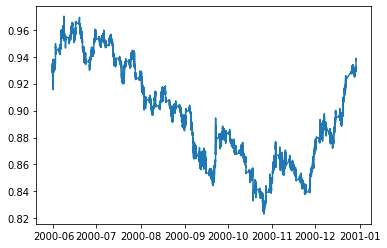

In [134]:
import pylab
xs = sub_dataset['date'] # valid date range
ys = sub_dataset['Close'] # some data (one undefined)
pylab.plot_date(xs, ys, ydate=False, linestyle='-', marker='')
pylab.show()

In [86]:
sub_dataset['date'][-1]

Timestamp('2000-12-29 11:25:00')

In [95]:
series = pd.date_range(sub_dataset['date'][0],sub_dataset['date'][-1], freq='min').to_series()
series.dt.dayofweek
sub_dataset['dayOfWeek']=series.dt.dayofweek

In [99]:
sub_dataset.head(5)
# 0 Lunes
# 1 Martes
# 2 Miercoles
# 3 Jueves
# 4 Viernes
# 5 Sabado
# 6 Domingo

,Open,High,Low,Close,Volume,date,dayOfWeek
Timestamp,,,,,,,
2000-05-30 17:27:00,0.9302,0.9302,0.9302,0.9302,0,2000-05-30 17:27:00,1
2000-05-30 17:35:00,0.9304,0.9305,0.9304,0.9305,0,2000-05-30 17:35:00,1
2000-05-30 17:38:00,0.9304,0.9304,0.9303,0.9303,0,2000-05-30 17:38:00,1
2000-05-30 17:43:00,0.9301,0.9301,0.9300,0.9300,0,2000-05-30 17:43:00,1
2000-05-30 17:44:00,0.9298,0.9298,0.9297,0.9297,0,2000-05-30 17:44:00,1


<Figure size 1008x360 with 0 Axes>

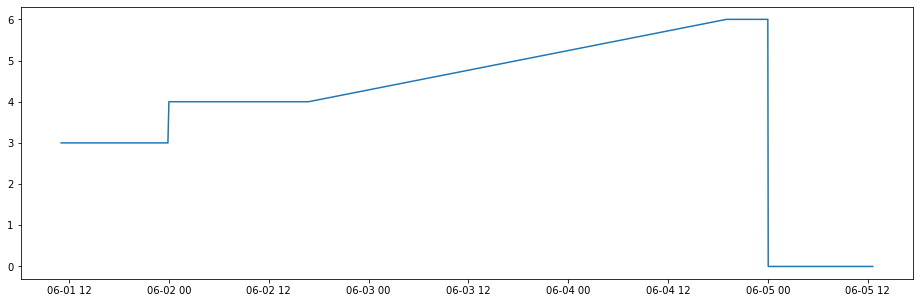

In [107]:
plt.figure(figsize=(14,5))
pyplot.figure(figsize=(16,5))
pyplot.plot(sub_dataset['Close'][1000:2000])
plt.xticks(sub_dataset['Close'][1000:2000], sub_dataset['Timestamp'])